In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [82]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/unsupervised_data.csv')
print(data.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(40000, 7)


In [83]:
features = data.iloc[:, 1:].values
print(features.shape)

(40000, 6)


In [84]:
features_scaled = (features - features.mean(axis=0)) / features.std(axis=0) #axis = zero makes sure the operation happens in independent columns
print (features_scaled.shape)

(40000, 6)


In [85]:
print(features_scaled.shape[0])

40000


In [86]:
def kmeans_clustering(data, k, max_iterations=1000, tol=1e-4):
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iterations):
        distances = np.linalg.norm(data[:, None] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([np.median(data[clusters == i], axis = 0) for i in range(k)])
        cost = np.sum(np.min(distances, axis=1))
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    return clusters, centroids, cost

In [87]:
def pca_reduce(data, n_components=2):
    data_centered = data - data.mean(axis=0)
    _, _, Vt = np.linalg.svd(data_centered, full_matrices=False)
    return np.dot(data_centered, Vt.T[:, :n_components]), Vt.T[:, :n_components]

In [88]:
k = 4 #after testing and trying this gave the best result amomg all
clusters, centroids, cost = kmeans_clustering(features_scaled, k)
features_2d, pca_components = pca_reduce(features_scaled, 2)
centroids_2d = np.dot(centroids - features_scaled.mean(axis=0), pca_components)

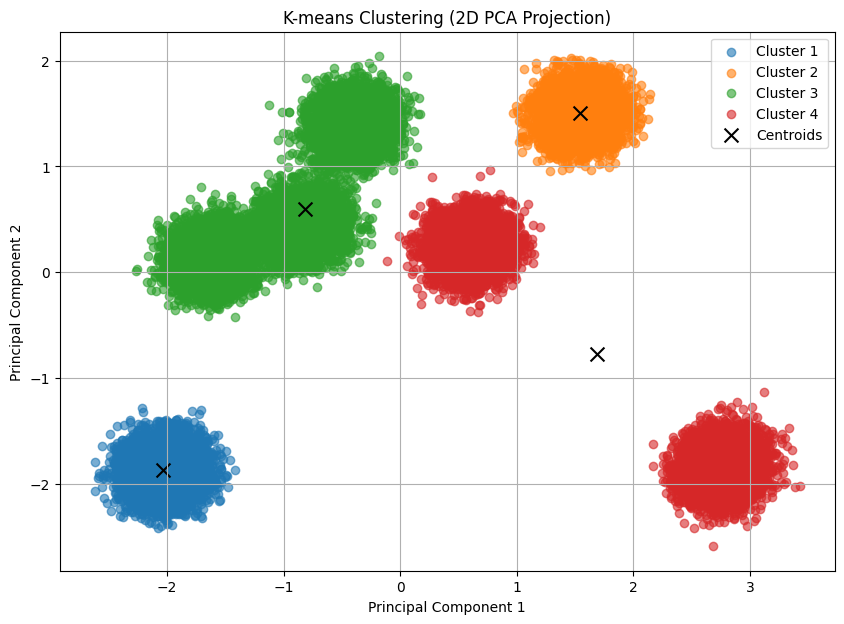

In [89]:
def plot_clusters(features_2d, clusters, centroids_2d, k):
    plt.figure(figsize=(10, 7))
    for i in range(k):
        plt.scatter(features_2d[clusters == i, 0], features_2d[clusters == i, 1], label=f"Cluster {i + 1}", alpha=0.6)
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], color='black', marker='x', s=100, label='Centroids')
    plt.title("K-means Clustering (2D PCA Projection)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_clusters(features_2d, clusters, centroids_2d, k)



In [90]:
def wcss(x,k_max):
  wcss = []
  for k in range(1,k_max+1):
    clusters, centroids, cost = kmeans_clustering(features_scaled, k)
    wcss.append(cost)
  plt.plot(range(1,k_max+1),wcss)
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()
  return wcss

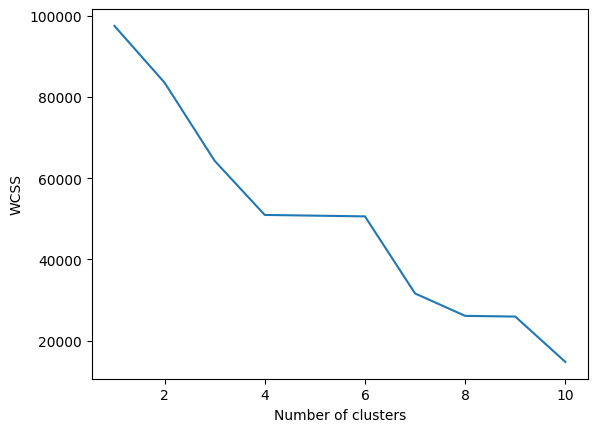

In [91]:
wcss = wcss(features_scaled,10)

In [92]:
wcss = pd.DataFrame(wcss, columns=['cost'])
wcss.to_csv('K_means_classification_cost.csv', index=False)
print(os.getcwd())
files.download('/content/K_means_classification_cost.csv')

/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>